From the Subjective Value formula, we can calculate new values:
# 
$$
SV = \frac{V}{1 + k\cdot d}
$$
$$
V = SV \cdot (1+ K \cdot d)
$$

Where V is the amount to be gained, d is the delay, SV the subjective value and K the kappa parameter of the hyperbolic discount

In [361]:

import csv
import os
#participant_code = input ("")
path = '/Volumes/UCDN/datasets/SDM/'
#path = 'Z:/datasets/SDM/'
participant_code = '23_SDM_0004_N'
print('the Participant Code is ' + participant_code)
#MAC path to the File share
participant_split_dir = os.path.join(path,'split') 
participant_trials = os.path.join(participant_split_dir,'{}/cdd/{}_cdd.csv').format(participant_code,participant_code) #This is the psychopy output CSV.We will use it to retrieve the probabilities and image files. 

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CDD_analysis.csv')

#parameters = pd.read_csv(utility_analysis)
amb_options = [0.24, 0.5, 0.74]

print('loading fn: {}'.format(participant_trials))
print('loading fn: {}'.format(utility_analysis))

#Extracting the parameters from participants

#Model parameters
kappa_value = None

# Open the CSV file and read its contents into csv_data
def get_kappa_value(utility_analysis):
    with open(utility_analysis, newline='') as file:
        reader = csv.DictReader(file)
    # Iterate through each row in the CSV
        for row in reader:
            if row['subject'] == participant_code:
                kappa_value = float(row['kappa'])
                break  # Exit the loop once the participant is found
    print ('kappa_value',kappa_value)
    return kappa_value

kappa_value = get_kappa_value(utility_analysis)


the Participant Code is 23_SDM_0004_N
loading fn: /Volumes/UCDN/datasets/SDM/split/23_SDM_0004_N/cdd/23_SDM_0004_N_cdd.csv
loading fn: /Volumes/UCDN/datasets/SDM/utility/split_CDD_analysis.csv
kappa_value 0.012000841879144998


In [2]:
import csv
import os
import random

In [3]:
#Declare the values of immediate values, delayed values, and wait times that we are going to use

amt_immed_options = random.sample(range(2, 65), 20)
amt_immed_options= [25, 10, 2, 20]
amt_del_options = random.sample(range(1, 65), 20)
time_options = [4, 5, 6, 9, 10, 11, 29, 30, 31, 59, 60, 61, 64, 89, 90, 91, 149, 150, 151, 152]

#Initialize an empty dictionary
trials_options = {'cdd_immed_amt': [], #TBD
          'cdd_delay_amt': [v for v in amt_del_options],
          'cdd_delay_wait': [t for t in time_options],
            'delay_SV': [],
            'deltaSV': []}

print('amt_immed_options',sorted(amt_immed_options))
print('amt_del_options',sorted(amt_del_options))
print('time_options',sorted(time_options))
#print('neg_deltaSV', neg_deltaSV)
sorted([25, 10, 2, 20])

amt_immed_options [2, 10, 20, 25]
amt_del_options [8, 14, 16, 17, 19, 26, 31, 32, 33, 40, 45, 51, 52, 53, 54, 55, 58, 62, 63, 64]
time_options [4, 5, 6, 9, 10, 11, 29, 30, 31, 59, 60, 61, 64, 89, 90, 91, 149, 150, 151, 152]


[2, 10, 20, 25]

Functions we are going to use

In [364]:

#This function adds SV and delta SV to a trials dictionary
def add_SV(trials, kappa_value): 
    """
    This function adds SV and delta SV to a trials dictionary
    """
    trials['delay_SV'] = [(v)/(1+kappa_value*D) for v, D 
                          in zip(trials['cdd_delay_amt'], trials['cdd_delay_wait'])]
    trials['deltaSV'] = [svdel - svimmed for  svdel, svimmed in zip(trials['delay_SV'], trials['cdd_immed_amt'])]
    return trials


def get_SE(trials, kappa_value): 
    """
     This function creates the trials of subjective equality.
     Inputs:
        - Option of values dictionary
        - Kappa
    Output:
        - Immediate options with the same subjective value as delayed options
    """ 
    SE_trials = {}
    SE_trials['category'] = ['SE_trials']*20
    # Retrieve cdd_delay_amt and cdd_delay_wait from the trials dictionary
    cdd_delay_amt = trials.get('cdd_delay_amt', [])
    cdd_delay_wait = trials.get('cdd_delay_wait', [])
    SE_trials['cdd_immed_amt'] = [(v)/(1+kappa_value*D) for v, D 
                          in zip(cdd_delay_amt, cdd_delay_wait)]
    SE_trials['cdd_delay_amt'] = cdd_delay_amt
    SE_trials['cdd_delay_wait'] = cdd_delay_wait
    
    return SE_trials



In [365]:

#To keep the dictionaries in order
def order_keys(dict):
    keys = ['category', 'cdd_immed_amt', 'cdd_delay_amt', 'cdd_delay_wait', 'delay_SV', 'deltaSV']
    return {k: dict[k] for k in keys if k in dict.keys()}

#To unpack nested lsits
def flatten(l):
    return [item for sublist in l for item in sublist]


def round_to_closest_half(number):
    rounded_number = round(number * 2) / 2
    return 0.5 if rounded_number == 0 else rounded_number

def find_middle(lst):
    if not lst:  # Check if the list is empty
        return "The list is empty."
 
    length = len(lst)  # Get the length of the list
 
    if length % 2 != 0:  # Check if the length is odd
        middle_index = length // 2
        return lst[middle_index]
 
    # If the length is even
    first_middle_index = length // 2 - 1
    second_middle_index = length // 2
    return (lst[first_middle_index], lst[second_middle_index])

In [366]:
SE_trials = get_SE(trials_options, kappa_value)
SE_trials = add_SV(SE_trials, kappa_value)
SE_trials = order_keys(SE_trials)
print(SE_trials)

{'category': ['SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials', 'SE_trials'], 'cdd_immed_amt': [33.39683925151727, 18.867849601655234, 34.51476273922233, 49.63864972229613, 49.999624163921055, 18.551084986318696, 35.607663692036745, 2.9411218514158173, 5.101943766893772, 33.37139485585436, 6.395161024905961, 12.701701910407271, 13.57424695473592, 7.253122119704964, 21.153075600967266, 24.37769235208303, 17.574532084227158, 15.356450270970125, 22.758572846676643, 14.871847349392379], 'cdd_delay_amt': [35, 20, 37, 55, 56, 21, 48, 4, 7, 57, 11, 22, 24, 15, 44, 51, 49, 43, 64, 42], 'cdd_delay_wait': [4, 5, 6, 9, 10, 11, 29, 30, 31, 59, 60, 61, 64, 89, 90, 91, 149, 150, 151, 152], 'delay_SV': [33.39683925151727, 18.867849601655234, 34.51476273922233, 49.63864972229613, 49.999624163921055, 18.55108

In [367]:
def get_Max_SVdelta(trials):
    """
    This function creates the trials with the Maximum Positive delta. 
    By assigning the largest amount we can pay to the delayed options and the least we can pay to the immediate options
    """
    
    cdd_delay_wait = trials.get('cdd_delay_wait', [])
    Max_SVdelta = {}
    Max_SVdelta['category'] = ['MaxSV']*20
    Max_SVdelta['cdd_delay_amt'] = [65.0]*20
    Max_SVdelta['cdd_immed_amt'] = [1.0]*20
    # Set cdd_delay_wait
    Max_SVdelta['cdd_delay_wait'] = cdd_delay_wait
    return Max_SVdelta


Max_SV_trials = get_Max_SVdelta(trials_options)
Max_SV_trials = add_SV(Max_SV_trials, kappa_value)
Max_SV_trials = order_keys(Max_SV_trials)


In [368]:
"""
def get_Min_SVdelta(trials):
    
    #This function creates de trials with the Maximum negative delta.
    #By assigning the largest amount we can pay to the immediate options and the least we can pay to the delay options 
    
    Min_SVdelta = {}
    cdd_delay_wait = trials.get('cdd_delay_wait', [])
    deltaSV = trials.get('deltaSV', [])
    neg_deltaSV = [-x for x in deltaSV]
    SV_imm = [x for x in amt_immed_options]
    Max_neg_delta = max(find_middle(neg_deltaSV))

    target_SV = [Max_neg_delta + svim for svim in SV_imm if (Max_neg_delta + svim) >0]
    target_SV = [x for x in target_SV if x> -Max_neg_delta]    
    target_SV = [round_to_closest_half(x) for x in target_SV]
    # Use a set to store unique 'cdd_delay_wait' values
    unique_cdd_delay_wait = set()

    list_dict = []
    for D in cdd_delay_wait:
         # Check if D is already in the set, if not, add to the set and process the data
        if D not in unique_cdd_delay_wait:
            unique_cdd_delay_wait.add(D)
            neg_SVdelta = {}
            neg_SVdelta['cdd_delay_amt'] = list(set([round_to_closest_half(SV * (1 + kappa_value * D)) for SV in target_SV]))
            neg_SVdelta['cdd_immed_amt'] = list(set([round_to_closest_half(SVdel - Max_neg_delta) for SVdel in target_SV]))
            neg_SVdelta['cdd_delay_wait'] = [D]*len(neg_SVdelta['cdd_delay_amt'])
            neg_SVdelta['category'] = ['NegDelta']*len(neg_SVdelta['cdd_delay_amt'])
            # Check condition and add to list_dict accordingly
            if all(Vimm < Vdel for (Vimm, Vdel) in zip (neg_SVdelta['cdd_immed_amt'], neg_SVdelta['cdd_delay_amt'])):
                list_dict += [neg_SVdelta]

    Min_SVdelta = {k :flatten([d[k] for d in list_dict]) for k in list_dict[0]}
    return Min_SVdelta
"""

def get_Min_SVdelta(trials,num_steps=2):
    Neg_SV_delta = {}
    SVE = SE_trials.get('delay_SV',[])
    SV_max = Max_SV_trials['delay_SV']
    SV_ranges = [SV_max - sve for (SV_max, sve) in zip (SV_max,SVE)]
    SV_step = [SV_range/(num_steps+1) for SV_range in SV_ranges]
    
    list_x = [i for i in range(-num_steps,-num_steps+1) if i != 0]
    list_dict = []
    for x in list_x:
        interm = {}
        interm['category'] = ['Neg'+str(x)]*len(trials['category'])
        interm['cdd_delay_amt'] = trials['cdd_delay_amt']
        interm['cdd_immed_amt'] = [SV_max - x * sv_step for (SV_max, sv_step) in zip(SV_max, SV_step)]
        interm['cdd_delay_wait'] = trials['cdd_delay_wait']
        
        list_dict += [interm]  
    Neg_SV_delta = {k :flatten([d[k] for d in list_dict]) for k in list_dict[0]}

    return Neg_SV_delta 


Min_SV_trials = get_Min_SVdelta(Max_SV_trials)
Min_SV_trials = add_SV(Min_SV_trials, kappa_value)
Min_SV_trials = order_keys(Min_SV_trials)
print(Min_SV_trials)


{'category': ['Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2', 'Neg-2'], 'cdd_immed_amt': [81.10660961082766, 89.62228560786237, 78.04689592382705, 64.6806647896586, 63.39238063639991, 83.33265160520938, 56.62607628803065, 77.69463557490118, 75.5573576906649, 41.177569091141926, 58.719205774136555, 54.07845813370369, 52.22314453419236, 47.54824500695476, 37.97938573810032, 35.530884931467426, 27.138903286527658, 28.451097788851627, 23.35124401455885, 28.445358819075903], 'cdd_delay_amt': [65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0], 'cdd_delay_wait': [4, 5, 6, 9, 10, 11, 29, 30, 31, 59, 60, 61, 64, 89, 90, 91, 149, 150, 151, 152], 'delay_SV': [62.0227014671035, 61.32051120537951, 60.63404264998516, 58.66385876271361, 58.03527804740837, 57.420024957653105, 48.21871124963309, 47.79323008550703

In [369]:
#Maximum neg delta SV for all delayes that are not catch trials (Vl>Vn)
def flatten(l):
    return [item for sublist in l for item in sublist]

def append_trial(full_dict,cur_dict):
    dict_list = [full_dict,cur_dict]
    return {k :flatten([d[k] for d in dict_list]) for k in dict_list[0]}

min_SV_trials = {'category':[],'cdd_delay_wait':[],'cdd_immed_amt':[],'cdd_delay_amt':[],'deltaSV':[]}

for d in time_options:
    SV_diff = 0
    for vn in amt_immed_options:
        for vl in amt_del_options:
            if vl <= vn:
                continue
            iSV_diff = (vl / (1+kappa_value*d)) - vn
            if iSV_diff < SV_diff:
                SV_diff = iSV_diff
                ivn,ivl = vn,vl
    dict_app = {'category':['minSV'],'cdd_delay_wait':[d],'cdd_immed_amt':[ivn],'cdd_delay_amt':[ivl],'deltaSV':[SV_diff]}
    min_SV_trials = append_trial(min_SV_trials,dict_app)

min_SV_trials = add_SV(min_SV_trials, kappa_value)
 

import pandas as pd
df = pd.DataFrame(min_SV_trials)
df

,category,cdd_delay_wait,cdd_immed_amt,cdd_delay_amt,deltaSV,delay_SV
0,minSV,4,63,64,-1.931494,61.068506
1,minSV,5,63,64,-2.622881,60.377119
2,minSV,6,63,64,-3.298789,59.701211
3,minSV,9,63,64,-5.238662,57.761338
4,minSV,10,63,64,-5.857572,57.142428
5,minSV,11,63,64,-6.463360,56.536640
6,minSV,29,63,64,-15.523115,47.476885
7,minSV,30,63,64,-15.942050,47.057950
8,minSV,31,63,64,-16.353657,46.646343
9,minSV,59,63,64,-25.530364,37.469636


In [370]:


def get_inter_deltaneg(trials, num_steps=2):
    inter_trials = {}  
    SV_min = max(Min_SV_trials['deltaSV'])
    SV_range = 0 - SV_min
    SV_step =  SV_range/(num_steps+1)
    SV = trials.get('delay_SV',[])
    list_x = [i for i in range(1, num_steps+1) if i != 0]
    list_dict = []

    for x in list_x:
        interm = {}
        interm['category'] = ['Int-'+str(x)]*len(trials['category'])
        interm['cdd_delay_amt'] = trials['cdd_delay_amt']
        interm['cdd_immed_amt'] = [sv + x * SV_step for sv in SV]
        interm['cdd_delay_wait'] = trials['cdd_delay_wait']
        list_dict.append(interm)  
    
    inter_trials = {k :flatten([d[k] for d in list_dict]) for k in list_dict[0]}

    return inter_trials 

def get_inter_deltaPos(trials, num_steps=2):
    inter_trials = {}
    SVE = SE_trials.get('delay_SV',[])
    SV_max = Max_SV_trials['delay_SV']
    SV_ranges = [SV_max - sve for (SV_max, sve) in zip (SV_max,SVE)]
    SV_step = [SV_range/(num_steps+1) for SV_range in SV_ranges]
    
    list_x = [i for i in range(-num_steps+1, num_steps+1) if i != 0]
    list_dict = []
    for x in list_x:
        interm = {}
        interm['category'] = ['Int'+str(x)]*len(trials['category'])
        interm['cdd_delay_amt'] = trials['cdd_delay_amt']
        interm['cdd_immed_amt'] = [SV_max - x * sv_step for (SV_max, sv_step) in zip(SV_max, SV_step)]
        interm['cdd_delay_wait'] = trials['cdd_delay_wait']
        list_dict.append(interm)  
    
    inter_trials = {k :flatten([d[k] for d in list_dict]) for k in list_dict[0]}

    return inter_trials 

Int_trials_deltaneg = get_inter_deltaneg(SE_trials)
Int_trials_deltaneg = add_SV(Int_trials_deltaneg, kappa_value)
Int_trials_deltaneg = order_keys(Int_trials_deltaneg)


Int_trials_deltapos = get_inter_deltaPos(Max_SV_trials)
Int_trials_deltapos = add_SV(Int_trials_deltapos, kappa_value)
Int_trials_deltapos = order_keys(Int_trials_deltapos)

Max_SV_trials_neg = Max_SV_trials.copy()
Max_SV_trials_neg['deltaSV'] = [-1.0 *x for x in Max_SV_trials_neg['deltaSV']]
Max_SV_trials_neg['category'] = ['Max_SV_trials_neg']*len(Max_SV_trials_neg['category'])
min_SV_trials_pos = min_SV_trials.copy()
min_SV_trials_pos['deltaSV'] = [-1.0 *x for x in min_SV_trials_pos['deltaSV']]
min_SV_trials_pos['category'] = ['min_SV_trials_pos']*len(min_SV_trials_pos['category'])



In [371]:
def dict_merge(dict1,dict2,dict3,dict4,dict5): 
     '''
     Merge dictionaries while keeping values in lists
     '''
     merged_dict = dict1.copy() # Start with the SE dictionary

     # Update values in dict_1 with values from dict_2
     for key, value in  dict2.items():
        merged_dict[key] = merged_dict[key] + value

     for key, value in dict3.items():
        merged_dict[key] = merged_dict[key] + value
     for key, value in dict4.items():
        merged_dict[key] = merged_dict[key] + value
     for key, value in dict5.items():
        merged_dict[key] = merged_dict[key] + value
  
     return merged_dict
trials = dict_merge(Max_SV_trials, Max_SV_trials_neg, min_SV_trials, min_SV_trials_pos, Int_trials_deltaneg)
trials['cdd_immed_wait'] = [0]*len(trials['category'])
import pandas as pd
pd.options.display.max_rows = 999
# Convert the dictionary to a DataFrame and set 'category' as index
df_trials = pd.DataFrame(trials)
col_order =['category', 'cdd_immed_amt', 'cdd_immed_wait', 'cdd_delay_amt', 'cdd_delay_wait', 'delay_SV', 'deltaSV']
df_trials = df_trials[col_order]
df_trials['catch_trials'] = df_trials['cdd_immed_amt'] > df_trials['cdd_delay_amt']
df_trials = df_trials.sort_values(by = ['deltaSV'])
df_trials

In [372]:
trials = dict_merge(Max_SV_trials, Max_SV_trials_neg, min_SV_trials, min_SV_trials_pos, Int_trials_deltaneg)
trials['cdd_immed_wait'] = [0]*len(trials['category'])
import pandas as pd
pd.options.display.max_rows = 999
# Convert the dictionary to a DataFrame and set 'category' as index
df_trials = pd.DataFrame(trials)
col_order =['category', 'cdd_immed_amt', 'cdd_immed_wait', 'cdd_delay_amt', 'cdd_delay_wait', 'delay_SV', 'deltaSV']
df_trials = df_trials[col_order]
df_trials['catch_trials'] = df_trials['cdd_immed_amt'] > df_trials['cdd_delay_amt']
df_trials = df_trials.sort_values(by = ['deltaSV'])
df_trials

In [373]:
import pandas as pd
pd.options.display.max_rows = 999
# Convert the dictionary to a DataFrame and set 'category' as index
df_trials = pd.DataFrame(trials)
col_order =['category', 'cdd_immed_amt', 'cdd_immed_wait', 'cdd_delay_amt', 'cdd_delay_wait', 'delay_SV', 'deltaSV']
df_trials = df_trials[col_order]
df_trials['catch_trials'] = df_trials['cdd_immed_amt'] > df_trials['cdd_delay_amt']
df_trials = df_trials.sort_values(by = ['deltaSV'])
df_trials

,category,cdd_immed_amt,cdd_immed_wait,cdd_delay_amt,cdd_delay_wait,delay_SV,deltaSV,catch_trials
20,Max_SV_trials_neg,1.000000,0,65.0,4,62.022701,-61.022701,False
21,Max_SV_trials_neg,1.000000,0,65.0,5,61.320511,-60.320511,False
22,Max_SV_trials_neg,1.000000,0,65.0,6,60.634043,-59.634043,False
23,Max_SV_trials_neg,1.000000,0,65.0,9,58.663859,-57.663859,False
24,Max_SV_trials_neg,1.000000,0,65.0,10,58.035278,-57.035278,False
25,Max_SV_trials_neg,1.000000,0,65.0,11,57.420025,-56.420025,False
26,Max_SV_trials_neg,1.000000,0,65.0,29,48.218711,-47.218711,False
27,Max_SV_trials_neg,1.000000,0,65.0,30,47.793230,-46.793230,False
28,Max_SV_trials_neg,1.000000,0,65.0,31,47.375192,-46.375192,False
59,minSV,63.000000,0,64.0,152,22.661863,-40.338137,False


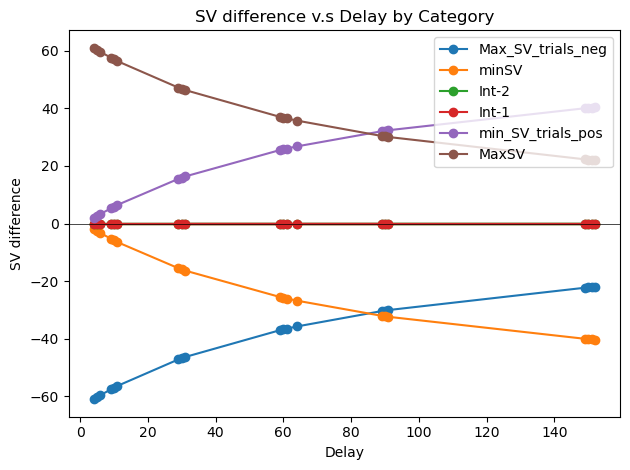

In [382]:
import matplotlib.pyplot as plt

def plot_scatter_by_category(df):
    # Get unique categories and assign a color to each category
    categories = df['category'].unique()
    colors = plt.cm.tab10.colors[:len(categories)]

    # Create a scatter plot for each category with a different color
    for i, category in enumerate(categories):
        category_data = df[df['category'] == category]
        plt.plot(category_data['cdd_delay_wait'], category_data['deltaSV'],'o-', label=category, color=colors[i])

    # Add labels and legend
    plt.xlabel('Delay')
    plt.ylabel('SV difference')
    plt.title('SV difference v.s Delay by Category')
    #plt.axvline(x=70, color='red', linestyle='--', label='xvline=70')
    plt.axhline(y=0, color='black', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot scatter plot with different colors for each category
plot_scatter_by_category(df_trials)



In [ ]:
max_sv_diff = [-1.0 * delta_sv for delta_sv in min_SV_trials['deltaSV']]
max_sv_diff

def get_max_SV_delta(max_sv_diff,amt_immed_options, time_options, Vmax= V_max):

    max_sv_trials = {'category':[],'cdd_delay_wait':[],'cdd_immed_amt':[],'cdd_delay_amt':[]}
    Vimm = min(amt_immed_options)
    for D in time_options:
        Vdel = [round_to_closest_half((delta_max+Vimm)*(1 + kappa_value*D)) for delta_max in max_sv_diff]
        print(Vdel)
        for v in Vdel:
            if v <= Vmax:
                max_sv_trials['cdd_delay_amt'].append(v)
                max_sv_trials['cdd_delay_wait'].append(D)
                max_sv_trials['cdd_immed_amt'].append(Vimm)
                max_sv_trials['category'] = ['MaxSV' + str(len(max_sv_trials['cdd_delay_amt']))]*len(max_sv_trials['cdd_delay_amt'])
    return max_sv_trials


Max_SV_trials = get_max_SV_delta(max_sv_diff,amt_immed_options, time_options)
Max_SV_trials = add_SV(Max_SV_trials, kappa_value)
Max_SV_trials = order_keys(Max_SV_trials)
print(Max_SV_trials)

df = pd.DataFrame(Max_SV_trials)
df

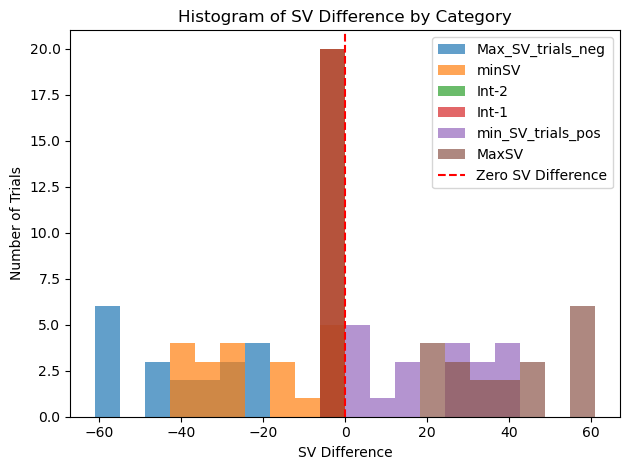

In [375]:
import numpy as np

def plot_histogram_by_category(df):
    # Get unique categories and assign a color to each category
    categories = df['category'].unique()
    colors = plt.cm.tab10.colors[:len(categories)]

    # Determine bin edges
    bin_edges = np.linspace(min(df['deltaSV']), max(df['deltaSV']), 21)  # 20 bins from 0 to maximum deltaSV

    # Create a histogram for SV difference for each category with a different color
    for i, category in enumerate(categories):
        category_data = df[df['category'] == category]
        plt.hist(category_data['deltaSV'], bins=bin_edges, alpha=0.7, label=category, color=colors[i])

    # Add labels and legend
    plt.xlabel('SV Difference')
    plt.ylabel('Number of Trials')
    plt.title('Histogram of SV Difference by Category')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero SV Difference')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot histogram with different colors for each category
plot_histogram_by_category(df_trials)
